In [1]:
pip install mlrose-hiive

     |████████████████████████████████| 49 kB 1.9 MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98351 sha256=38761eb8b34e73a96fbc2dc347232342eefc345224b641328e16304aaa4128d5
  Stored in directory: /root/.cache/pip/wheels/ca/9c/44/36113054dda94da67040173c2a475dbfb6980c2c6ddf5747b1
Successfully built mlrose-hiive


In [2]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner, MIMICRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [3]:
def eval_score (num_eval, f_score, method):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.plot(num_eval, f_score)
  plt.title(f'Fitness Score - Number of Evaluation on {method}', fontsize= 18)
  plt.xlabel('# Fitness Function Evaluation', fontsize = 18)
  plt.ylabel('Fitness Score', fontsize = 18)
  plt.show()

In [4]:
def eval_time (num_eval, time, method):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.plot(num_eval, time)
  plt.title(f'Running Time/Number of Evaluation on {method}', fontsize = 18)
  plt.xlabel('# Fitness Function Evaluation', fontsize = 18)
  plt.ylabel('Running Time', fontsize = 18)
  plt.show()

In [5]:
def iter_score (num_iter, fit, method):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.plot(num_iter, fit)
  plt.title(f'Fitness Score - Number of Iteration on {method}', fontsize = 18)
  plt.xlabel('# Iteration', fontsize = 18)
  plt.ylabel('Fitness Score', fontsize = 18)
  plt.show()

In [6]:
def iter_compare (num_iter, fit_1, fit_2, label_1, label_2, xlabel, ylabel, title):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.title(f'{title} Comparison on Best Runner', fontsize = 18)
  plt.plot(num_iter, fit_1, label= label_1, color='r')
  plt.plot(num_iter, fit_2, label= label_2, color='b')
  plt.xlabel(xlabel, fontsize = 18)
  plt.ylabel(ylabel, fontsize = 18)
  plt.legend(loc='best')

In [7]:
def iter_final_compare (num_iter, fit_1, fit_2, fit_3, fit_4, label_1, label_2, label_3, label_4, xlabel, ylabel, title):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.title(f'{title} Best Runners Comparison', fontsize = 18)
  plt.plot(num_iter, fit_1, label= label_1, color='r')
  plt.plot(num_iter, fit_2, label= label_2, color='b')
  plt.plot(num_iter, fit_3, label= label_3, color='g')
  plt.plot(num_iter, fit_4, label= label_4, color='black')
  plt.xlabel(xlabel, fontsize = 18)
  plt.ylabel(ylabel, fontsize = 18)
  plt.legend(loc='best')

In [8]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
% cd "/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #2"

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #2


In [10]:
# Generate a new Max K problem using a fixed seed.
problem = MaxKColorGenerator().generate(seed=0, number_of_nodes=12, max_connections_per_node=3, max_colors=3)

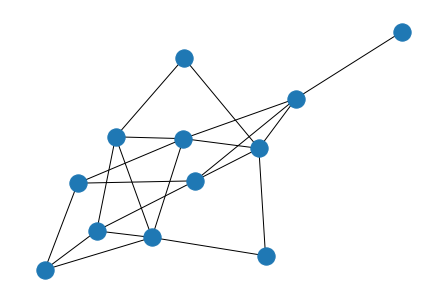

In [11]:
nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 0))
plt.show()

In [12]:
rhc = RHCRunner(problem, experiment_name= 'max_k_color_rhc', seed=0,
                iteration_list = 2 ** np.arange(11),
                restart_list= [10, 20, 50],
                generate_curves= True)

In [13]:
df_rhc_stats, df_rhc_curves = rhc.run()

In [14]:
best_fitness_rhc = df_rhc_curves['Fitness'].min()

best_runs_rhc = df_rhc_curves[df_rhc_curves['Fitness'] == best_fitness_rhc]

best_runs_rhc

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
1103,25,0.023195,1.0,1116.0,10,1024,2
1104,26,0.023259,1.0,1117.0,10,1024,2
1105,27,0.023316,1.0,1118.0,10,1024,2
1106,28,0.023382,1.0,1119.0,10,1024,2
1107,29,0.023441,1.0,1120.0,10,1024,2
...,...,...,...,...,...,...,...
44389,569,0.178181,1.0,27535.0,50,1024,50
44390,570,0.178837,1.0,27536.0,50,1024,50
44391,571,0.182465,1.0,27537.0,50,1024,50
44392,572,0.182853,1.0,27538.0,50,1024,50


In [15]:
min_evaluation = best_runs_rhc['FEvals'].min()

optim_rhc = best_runs_rhc[best_runs_rhc['FEvals'] == min_evaluation]

optim_rhc

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
1103,25,0.023195,1.0,1116.0,10,1024,2
6967,25,0.023195,1.0,1116.0,20,1024,2
18182,25,0.023195,1.0,1116.0,50,1024,2


In [16]:
# Best Params

restart = 10
#iteration = 32 # Infered from total 25 number of iteration to achieve optimum fitness 

best_params_runs_rhc = df_rhc_stats[(df_rhc_stats['Restarts'] == restart) & 
                                    (df_rhc_stats['current_restart'] == 2)]

best_params_runs_rhc

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
24,0,6.0,1086,0.474887,"[2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0]",10,1024,2
25,1,5.0,1088,0.480288,"[2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0]",10,1024,2
26,2,4.0,1090,0.485837,"[2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0]",10,1024,2
27,4,4.0,1092,0.491796,"[2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0]",10,1024,2
28,8,4.0,1096,0.499669,"[2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0]",10,1024,2
29,16,3.0,1105,0.510123,"[2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0]",10,1024,2
30,32,1.0,1123,0.525816,"[2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0]",10,1024,2
31,64,1.0,1155,0.557020,"[2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0]",10,1024,2
32,128,1.0,1219,0.604865,"[2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0]",10,1024,2
33,256,1.0,1347,0.704248,"[2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0]",10,1024,2


In [17]:
# Row 0 is our answer due to less running time
best_params_runs_rhc.iloc()[2]

Iteration                                             2
Fitness                                             4.0
FEvals                                             1090
Time                                           0.485837
State              [2, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0]
Restarts                                             10
max_iters                                          1024
current_restart                                       2
Name: 26, dtype: object

In [18]:
State = [2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0]
print(f'Graph Nodes In Order of Map: {[n for n in problem.source_graph.nodes]}')
color_indexes = literal_eval(best_params_runs_rhc['State'].values[0])
ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
print(f'Color Code of Ordered States: {ordered_state}')

Graph Nodes In Order of Map: [0, 6, 1, 2, 3, 10, 4, 5, 7, 9, 8, 11]
Color Code of Ordered States: [2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0]


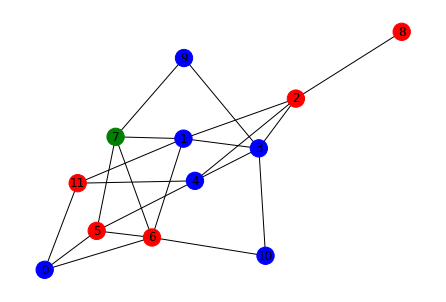

In [19]:
colors = ['r', 'g', 'b']
node_color_map = [colors[s] for s in ordered_state]

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 0),
        with_labels=True,
        node_color=node_color_map)
plt.show()

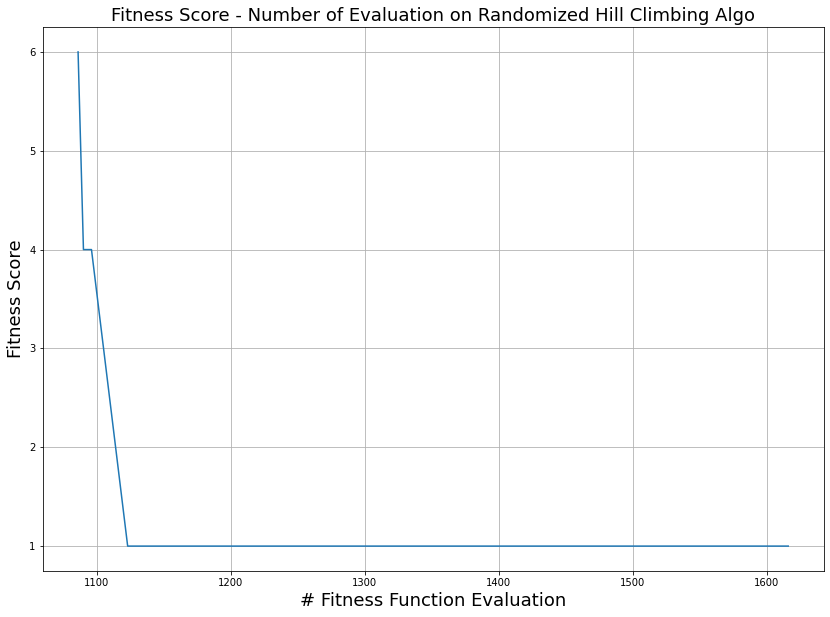

In [20]:
eval_score(best_params_runs_rhc['FEvals'], best_params_runs_rhc['Fitness'], 'Randomized Hill Climbing Algo')

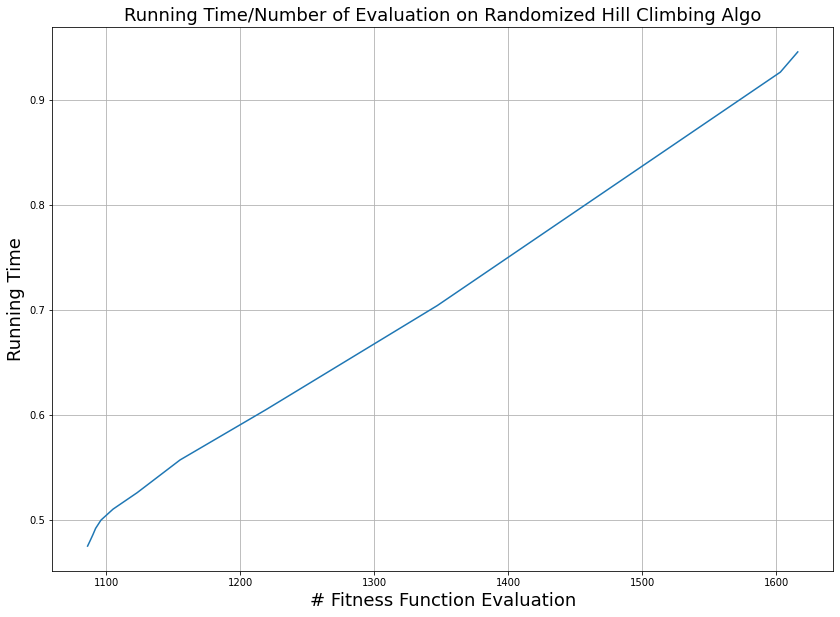

In [21]:
eval_time(best_params_runs_rhc['FEvals'], best_params_runs_rhc['Time'], 'Randomized Hill Climbing Algo')

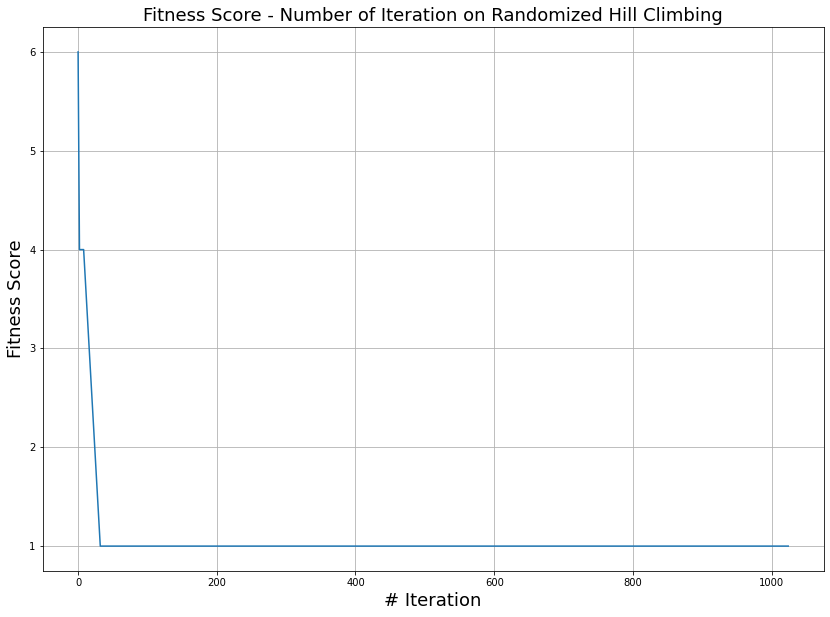

In [22]:
iter_score(best_params_runs_rhc['Iteration'], best_params_runs_rhc['Fitness'], 'Randomized Hill Climbing')

Simulated Anealing Algorithm on Max K Color Problem

In [ ]:
sa = SARunner(problem, experiment_name='max_k_color_sa', seed=0,
              iteration_list = 2 ** np.arange(11),
              temperature_list= [0.1, 0.5, 1, 1.5, 2, 5],
              decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])

In [ ]:
df_sa_stats, df_sa_curves = sa.run()

In [ ]:
best_fitness_sa = df_sa_curves['Fitness'].min()

best_runs_sa = df_sa_curves[df_sa_curves['Fitness'] == best_fitness_sa]

best_runs_sa

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
32,32,0.016404,1.0,43.0,0.1,1024
33,33,0.018220,1.0,44.0,0.1,1024
34,34,0.018289,1.0,45.0,0.1,1024
35,35,0.018361,1.0,46.0,0.1,1024
36,36,0.018422,1.0,47.0,0.1,1024
...,...,...,...,...,...,...
12295,1020,0.352578,1.0,1435.0,5,1024
12296,1021,0.353122,1.0,1436.0,5,1024
12297,1022,0.353698,1.0,1437.0,5,1024
12298,1023,0.354267,1.0,1438.0,5,1024


In [ ]:
min_evaluation_sa = best_runs_sa['FEvals'].min()

optim_sa = best_runs_sa[best_runs_sa['FEvals'] == min_evaluation_sa]

optim_sa

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
32,32,0.016404,1.0,43.0,0.1,1024
1057,32,0.016404,1.0,43.0,0.1,1024


In [ ]:
# Best Params

temprature = optim_sa['Temperature'].iloc()[0] #0.1
iteration = optim_sa['Iteration'].iloc()[0] #32

best_params_runs_sa = df_sa_stats[(df_sa_stats['Temperature'] == temprature)]

best_params_runs_sa
                                

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
0,0,9.0,0,0.000236,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,0.1,0.99,0.001,0.100000,0.1,1024,NaN
1,1,9.0,1,0.003433,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,0.1,0.99,0.001,0.099997,0.1,1024,NaN
2,2,8.0,3,0.006802,"[0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,0.1,0.99,0.001,0.099993,0.1,1024,NaN
3,4,8.0,5,0.009310,"[0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,0.1,0.99,0.001,0.099991,0.1,1024,NaN
4,8,6.0,12,0.011303,"[2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0]",geometric,0.1,0.99,0.001,0.099989,0.1,1024,NaN
5,16,2.0,25,0.013427,"[2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0]",geometric,0.1,0.99,0.001,0.099987,0.1,1024,NaN
6,32,1.0,43,0.016404,"[2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0]",geometric,0.1,0.99,0.001,0.099984,0.1,1024,NaN
7,64,1.0,80,0.020546,"[2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1]",geometric,0.1,0.99,0.001,0.099979,0.1,1024,NaN
8,128,1.0,154,0.028173,"[0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1]",geometric,0.1,0.99,0.001,0.099972,0.1,1024,NaN
9,256,1.0,309,0.048937,"[1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0]",geometric,0.1,0.99,0.001,0.099951,0.1,1024,NaN


In [ ]:
print(f'Graph Nodes In Order of Map: {[n for n in problem.source_graph.nodes]}')
color_indexes_sa = literal_eval(best_params_runs_sa['State'].iloc()[6])
ordered_state_sa = [color_indexes[n] for n in problem.source_graph.nodes]
print(f'Color Code of Ordered States: {ordered_state_sa}')

Graph Nodes In Order of Map: [0, 6, 1, 2, 3, 10, 4, 5, 7, 9, 8, 11]
Color Code of Ordered States: [2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0]


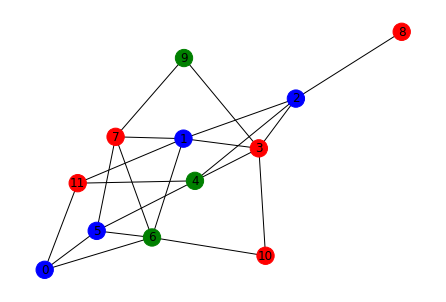

In [ ]:
colors = ['r', 'g', 'b']
node_color_map_sa = [colors[s] for s in ordered_state_sa]

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 0),
        with_labels=True,
        node_color=node_color_map_sa)
plt.show()

In [ ]:
df_sa_plot_geo = df_sa_stats[(df_sa_stats['Temperature'] == temprature) & (df_sa_stats['schedule_type'] == 'geometric')]
df_sa_plot_geo

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
0,0,9.0,0,0.000236,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,0.1,0.99,0.001,0.100000,0.1,1024,NaN
1,1,9.0,1,0.003433,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,0.1,0.99,0.001,0.099997,0.1,1024,NaN
2,2,8.0,3,0.006802,"[0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,0.1,0.99,0.001,0.099993,0.1,1024,NaN
3,4,8.0,5,0.009310,"[0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,0.1,0.99,0.001,0.099991,0.1,1024,NaN
4,8,6.0,12,0.011303,"[2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0]",geometric,0.1,0.99,0.001,0.099989,0.1,1024,NaN
5,16,2.0,25,0.013427,"[2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0]",geometric,0.1,0.99,0.001,0.099987,0.1,1024,NaN
6,32,1.0,43,0.016404,"[2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0]",geometric,0.1,0.99,0.001,0.099984,0.1,1024,NaN
7,64,1.0,80,0.020546,"[2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1]",geometric,0.1,0.99,0.001,0.099979,0.1,1024,NaN
8,128,1.0,154,0.028173,"[0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1]",geometric,0.1,0.99,0.001,0.099972,0.1,1024,NaN
9,256,1.0,309,0.048937,"[1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0]",geometric,0.1,0.99,0.001,0.099951,0.1,1024,NaN


In [ ]:
temprature_exp = df_sa_stats[(df_sa_stats['schedule_type'] == 'exponential')]['Temperature'].iloc()[0]
df_sa_plot_exp = df_sa_stats[(df_sa_stats['Temperature'] == temprature_exp) & (df_sa_stats['schedule_type'] == 'exponential')]

df_sa_plot_exp

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
12,0,9.0,0,0.000106,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",exponential,0.1,NaN,0.001,0.100000,0.1,1024,0.005
13,1,9.0,1,0.003728,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",exponential,0.1,NaN,0.001,0.099998,0.1,1024,0.005
14,2,8.0,3,0.006867,"[0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",exponential,0.1,NaN,0.001,0.099997,0.1,1024,0.005
15,4,8.0,5,0.010187,"[0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",exponential,0.1,NaN,0.001,0.099995,0.1,1024,0.005
16,8,6.0,12,0.013473,"[2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0]",exponential,0.1,NaN,0.001,0.099993,0.1,1024,0.005
17,16,2.0,25,0.017254,"[2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0]",exponential,0.1,NaN,0.001,0.099991,0.1,1024,0.005
18,32,1.0,43,0.021670,"[2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0]",exponential,0.1,NaN,0.001,0.099989,0.1,1024,0.005
19,64,1.0,80,0.027140,"[2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1]",exponential,0.1,NaN,0.001,0.099986,0.1,1024,0.005
20,128,1.0,154,0.036802,"[0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1]",exponential,0.1,NaN,0.001,0.099982,0.1,1024,0.005
21,256,1.0,309,0.060125,"[1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0]",exponential,0.1,NaN,0.001,0.099970,0.1,1024,0.005


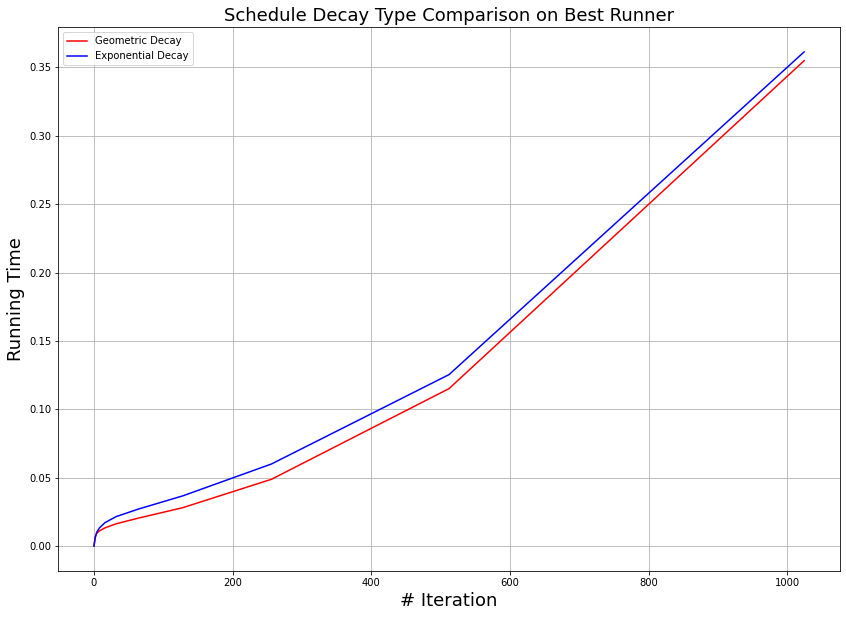

In [ ]:
iter_compare(df_sa_plot_geo['Iteration'], df_sa_plot_geo['Time'], df_sa_plot_exp['Time'], 'Geometric Decay', 'Exponential Decay', '# Iteration', 'Running Time', 'Schedule Decay Type')

In [ ]:
temprature_max = df_sa_stats['schedule_init_temp'].max()
df_sa_plot_temp_max = df_sa_stats[(df_sa_stats['schedule_init_temp'] == temprature_max) & (df_sa_stats['schedule_type'] == 'geometric')]

df_sa_plot_temp_max

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
120,0,9.0,0,0.000101,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,5.0,0.99,0.001,4.999995,5,1024,NaN
121,1,10.0,2,0.016834,"[1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,5.0,0.99,0.001,4.999154,5,1024,NaN
122,2,9.0,4,0.033320,"[0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,5.0,0.99,0.001,4.998326,5,1024,NaN
123,4,9.0,8,0.049947,"[0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",geometric,5.0,0.99,0.001,4.997491,5,1024,NaN
124,8,6.0,15,0.066146,"[2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0]",geometric,5.0,0.99,0.001,4.996677,5,1024,NaN
125,16,4.0,31,0.083598,"[2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1]",geometric,5.0,0.99,0.001,4.995801,5,1024,NaN
126,32,5.0,60,0.103705,"[2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1]",geometric,5.0,0.99,0.001,4.994791,5,1024,NaN
127,64,8.0,120,0.125338,"[0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0]",geometric,5.0,0.99,0.001,4.993706,5,1024,NaN
128,128,3.0,233,0.152390,"[1, 2, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0]",geometric,5.0,0.99,0.001,4.992348,5,1024,NaN
129,256,1.0,412,0.187011,"[1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2]",geometric,5.0,0.99,0.001,4.990611,5,1024,NaN


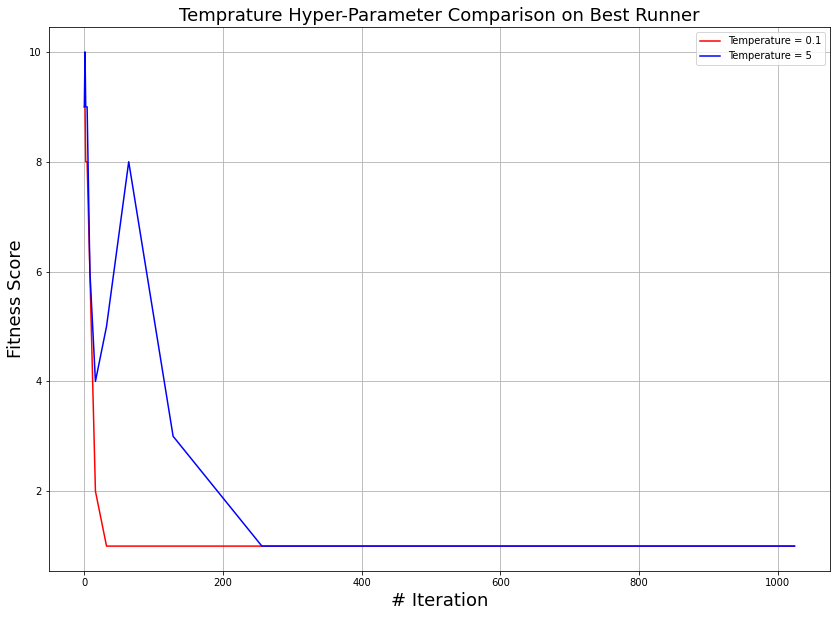

In [ ]:
iter_compare(df_sa_plot_geo['Iteration'], df_sa_plot_geo['Fitness'], df_sa_plot_temp_max['Fitness'], 'Temperature = 0.1', 'Temperature = 5', '# Iteration', 'Fitness Score', 'Temprature Hyper-Parameter')

GA

In [ ]:
ga = GARunner(problem, experiment_name= 'max_k_color_ga', seed=0,
              iteration_list = 2 ** np.arange(11), population_sizes=[10, 20, 50],
              mutation_rates=[0.1, 0.3, 0.5])

In [ ]:
df_ga_stats, df_ga_curves = ga.run()

In [ ]:
best_fitness_ga = df_ga_curves['Fitness'].min()

best_runs_ga = df_ga_curves[df_ga_curves['Fitness'] == best_fitness_ga]

best_runs_ga

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
43,43,0.049178,1.0,487.0,10,0.1,1024
44,44,0.049828,1.0,498.0,10,0.1,1024
45,45,0.050551,1.0,509.0,10,0.1,1024
46,46,0.051748,1.0,520.0,10,0.1,1024
47,47,0.052448,1.0,531.0,10,0.1,1024
...,...,...,...,...,...,...,...
4622,500,0.444682,1.0,25552.0,50,0.5,1024
4623,501,0.445556,1.0,25603.0,50,0.5,1024
4624,502,0.446611,1.0,25654.0,50,0.5,1024
4625,503,0.447575,1.0,25705.0,50,0.5,1024


In [ ]:
# Best Params

pop_size = 10
mut_rate = 0.1

best_params_runs_ga = df_ga_stats[(df_ga_stats['Population Size'] == pop_size)&
                                  (df_ga_stats['Mutation Rate'] == mut_rate)]

best_params_runs_ga

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
0,0,9.0,10,0.000733,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",10,0.1,1024
1,1,4.0,22,0.006387,"[2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1]",10,0.1,1024
2,2,3.0,34,0.010425,"[1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0]",10,0.1,1024
3,4,3.0,56,0.015078,"[1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0]",10,0.1,1024
4,8,3.0,100,0.019659,"[1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0]",10,0.1,1024
5,16,3.0,188,0.026895,"[1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0]",10,0.1,1024
6,32,2.0,365,0.039736,"[1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2, 0]",10,0.1,1024
7,64,1.0,718,0.064387,"[1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0]",10,0.1,1024
8,128,1.0,1422,0.112766,"[1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0]",10,0.1,1024
9,256,1.0,2830,0.214916,"[1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0]",10,0.1,1024


In [ ]:
best_params_run_ga_best = best_params_runs_ga[(best_params_runs_ga['Fitness'] == best_fitness_ga) & 
                    (best_params_runs_ga['Iteration'] == 64)]

In [ ]:
print(f'Graph Nodes In Order of Map: {[n for n in problem.source_graph.nodes]}')
color_indexes_ga = literal_eval(best_params_run_ga_best['State'].values[0])
ordered_state_ga = [color_indexes[n] for n in problem.source_graph.nodes]
print(f'Color Code of Ordered States: {ordered_state_ga}')

Graph Nodes In Order of Map: [0, 6, 1, 2, 3, 10, 4, 5, 7, 9, 8, 11]
Color Code of Ordered States: [2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0]


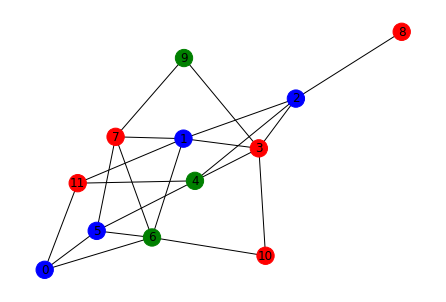

In [ ]:
colors = ['r', 'g', 'b']
node_color_map_ga = [colors[s] for s in ordered_state_ga]

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 0),
        with_labels=True,
        node_color=node_color_map_ga)
plt.show()

In [ ]:
df_ga_stats_large_pop = df_ga_stats[(df_ga_stats['Population Size'] == 50) &
                                    (df_ga_stats['Mutation Rate'] == 0.1)]

df_ga_stats_large_pop                                    

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
72,0,9.0,50,0.004334,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",50,0.1,1024
73,1,2.0,102,0.024017,"[1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2]",50,0.1,1024
74,2,2.0,153,0.042712,"[1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2]",50,0.1,1024
75,4,1.0,256,0.067363,"[2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1]",50,0.1,1024
76,8,1.0,460,0.134589,"[2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1]",50,0.1,1024
77,16,1.0,868,0.184637,"[2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1]",50,0.1,1024
78,32,1.0,1684,0.241903,"[2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1]",50,0.1,1024
79,64,1.0,3316,0.350447,"[2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1]",50,0.1,1024
80,128,1.0,6580,0.568153,"[2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1]",50,0.1,1024
81,256,1.0,13108,1.000196,"[2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1]",50,0.1,1024


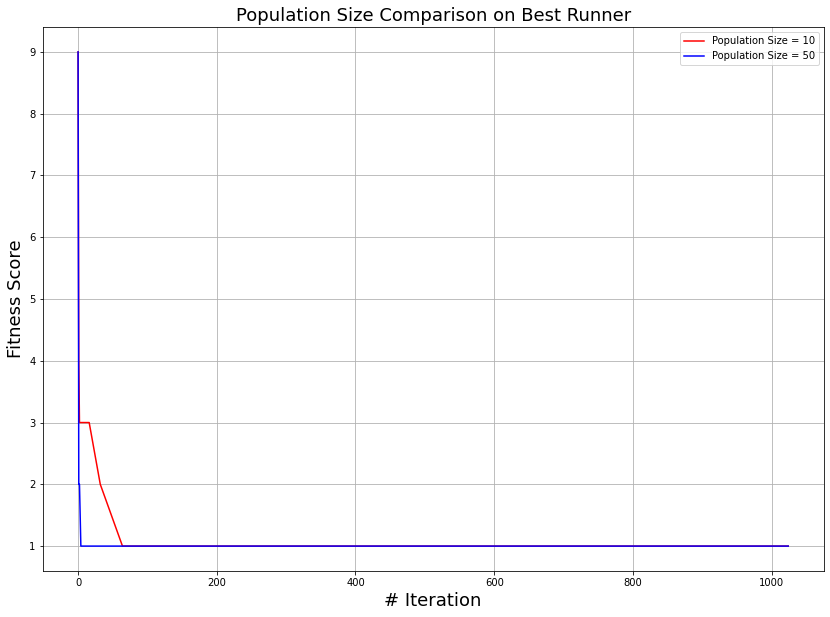

In [ ]:
iter_compare(best_params_runs_ga['Iteration'], best_params_runs_ga['Fitness'], df_ga_stats_large_pop['Fitness'], 'Population Size = 10', 'Population Size = 50',
             '# Iteration', 'Fitness Score', 'Population Size')

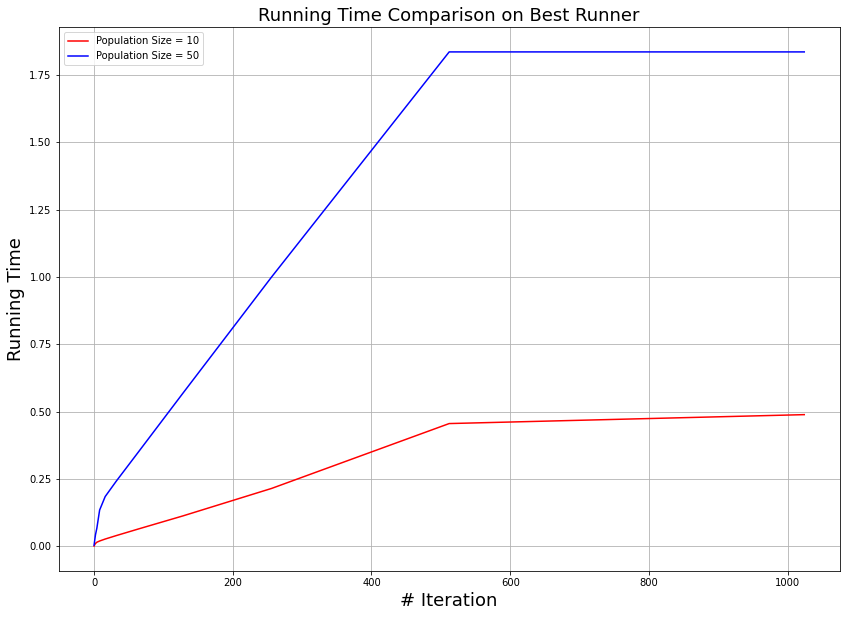

In [ ]:
iter_compare(best_params_runs_ga['Iteration'], best_params_runs_ga['Time'], df_ga_stats_large_pop['Time'], 'Population Size = 10', 'Population Size = 50',
             '# Iteration', 'Running Time', 'Running Time')

In [ ]:
df_ga_stats_large_mut = df_ga_stats[(df_ga_stats['Population Size'] == 10) &
                                    (df_ga_stats['Mutation Rate'] == 0.5)]

df_ga_stats_large_mut    

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
24,0,9.0,10,0.000386,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",10,0.5,1024
25,1,4.0,22,0.004353,"[1, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2]",10,0.5,1024
26,2,4.0,33,0.008392,"[1, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2]",10,0.5,1024
27,4,2.0,56,0.013275,"[1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0]",10,0.5,1024
28,8,2.0,100,0.019977,"[1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0]",10,0.5,1024
29,16,1.0,189,0.033284,"[1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0]",10,0.5,1024
30,32,1.0,365,0.048128,"[1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0]",10,0.5,1024
31,64,1.0,717,0.075079,"[1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0]",10,0.5,1024
32,128,1.0,1421,0.150255,"[1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0]",10,0.5,1024
33,256,1.0,2829,0.368794,"[1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0]",10,0.5,1024


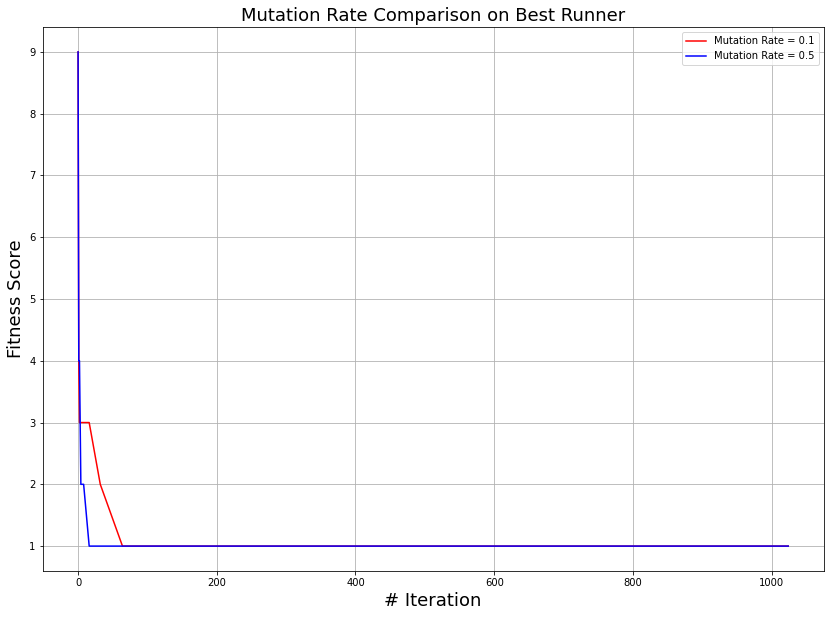

In [ ]:
iter_compare(best_params_runs_ga['Iteration'], best_params_runs_ga['Fitness'], df_ga_stats_large_mut['Fitness'], 'Mutation Rate = 0.1', 'Mutation Rate = 0.5',
             '# Iteration', 'Fitness Score', 'Mutation Rate')

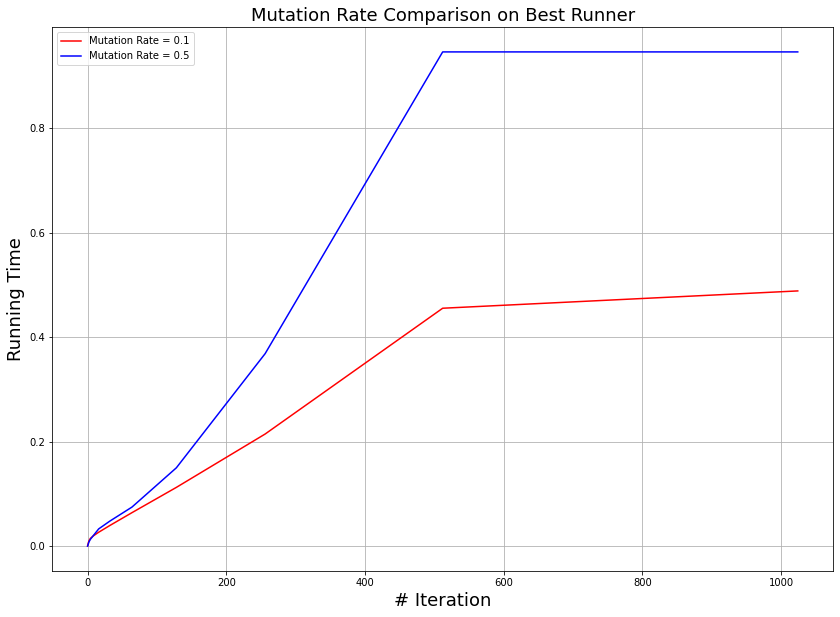

In [ ]:
iter_compare(best_params_runs_ga['Iteration'], best_params_runs_ga['Time'], df_ga_stats_large_mut['Time'], 'Mutation Rate = 0.1', 'Mutation Rate = 0.5',
             '# Iteration', 'Running Time', 'Mutation Rate')

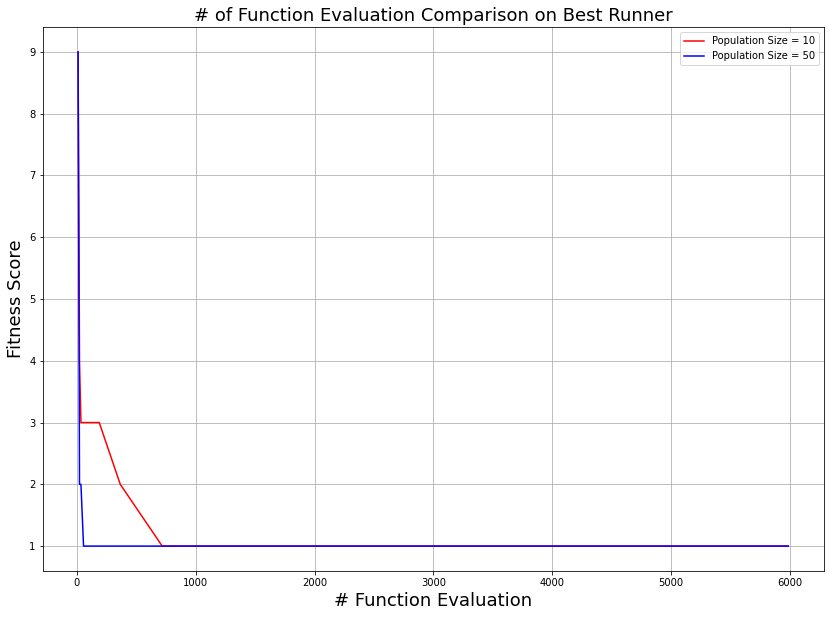

In [ ]:
iter_compare(best_params_runs_ga['FEvals'], best_params_runs_ga['Fitness'], df_ga_stats_large_pop['Fitness'], 'Population Size = 10', 'Population Size = 50',
             '# Function Evaluation', 'Fitness Score', '# of Function Evaluation')

MIMC

In [ ]:
mc = MIMICRunner(problem, experiment_name = 'mak_k_color_mc', seed=0,
                 iteration_list= 2 ** np.arange(11), 
                 population_sizes= [10, 30, 50],
                 keep_percent_list= [0.1, 0.3, 0.5, 1],
                 use_fast_mimic= True)

In [ ]:
df_mc_stats, df_mc_curves = mc.run()

In [ ]:
best_fitness_mc = df_mc_curves['Fitness'].min()

best_runs_mc = df_mc_curves[df_mc_curves['Fitness'] == best_fitness_mc]

best_runs_mc

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
2513,2,0.023888,1.0,94.0,True,30,0.3,1024
2514,3,0.029661,1.0,125.0,True,30,0.3,1024
2515,4,0.033707,1.0,156.0,True,30,0.3,1024
2516,5,0.039573,1.0,187.0,True,30,0.3,1024
2517,6,0.043602,1.0,218.0,True,30,0.3,1024
...,...,...,...,...,...,...,...,...
6039,503,0.008022,1.0,25705.0,True,50,1.0,1024
6040,504,0.015653,1.0,25756.0,True,50,1.0,1024
6041,505,0.023079,1.0,25807.0,True,50,1.0,1024
6042,506,0.027399,1.0,25858.0,True,50,1.0,1024


In [ ]:
# Best Params

pop_size = 30
keep_percent = 0.3

best_params_run_mc = df_mc_stats[(df_mc_stats['Population Size'] == pop_size) &
                              (df_mc_stats['Keep Percent'] == keep_percent)]

best_params_run_mc                              

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
60,0,9.0,30,0.000883,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",True,30,0.3,1024
61,1,2.0,62,0.012366,"[0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 2.0, 1.0, 2.0, ...",True,30,0.3,1024
62,2,1.0,94,0.023918,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, ...",True,30,0.3,1024
63,4,1.0,156,0.040796,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, ...",True,30,0.3,1024
64,8,1.0,280,0.064543,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, ...",True,30,0.3,1024
65,16,1.0,528,0.107490,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, ...",True,30,0.3,1024
66,32,1.0,1024,0.186317,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, ...",True,30,0.3,1024
67,64,1.0,2016,0.336306,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, ...",True,30,0.3,1024
68,128,1.0,4000,0.634487,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, ...",True,30,0.3,1024
69,256,1.0,7968,1.238702,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, ...",True,30,0.3,1024


In [ ]:
optim_run_mc = best_params_run_mc[(best_params_run_mc['Fitness'] == best_fitness_mc) & (best_params_run_mc['Iteration']==2)]

optim_run_mc

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
62,2,1.0,94,0.023918,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, ...",True,30,0.3,1024


In [ ]:
best_params_run_mc_large_pop = df_mc_stats[(df_mc_stats['Population Size'] == 50) &
                              (df_mc_stats['Keep Percent'] == keep_percent)]

best_params_run_mc_large_pop

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
108,0,9.0,50,0.001154,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",True,50,0.3,1024
109,1,2.0,102,0.017511,"[0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,50,0.3,1024
110,2,2.0,153,0.032972,"[0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,50,0.3,1024
111,4,1.0,256,0.054370,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, ...",True,50,0.3,1024
112,8,1.0,460,0.085994,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, ...",True,50,0.3,1024
113,16,1.0,868,0.147079,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, ...",True,50,0.3,1024
114,32,1.0,1684,0.241178,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, ...",True,50,0.3,1024
115,64,1.0,3316,0.416782,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, ...",True,50,0.3,1024
116,128,1.0,6580,0.742732,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, ...",True,50,0.3,1024
117,256,1.0,13108,1.384306,"[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, ...",True,50,0.3,1024


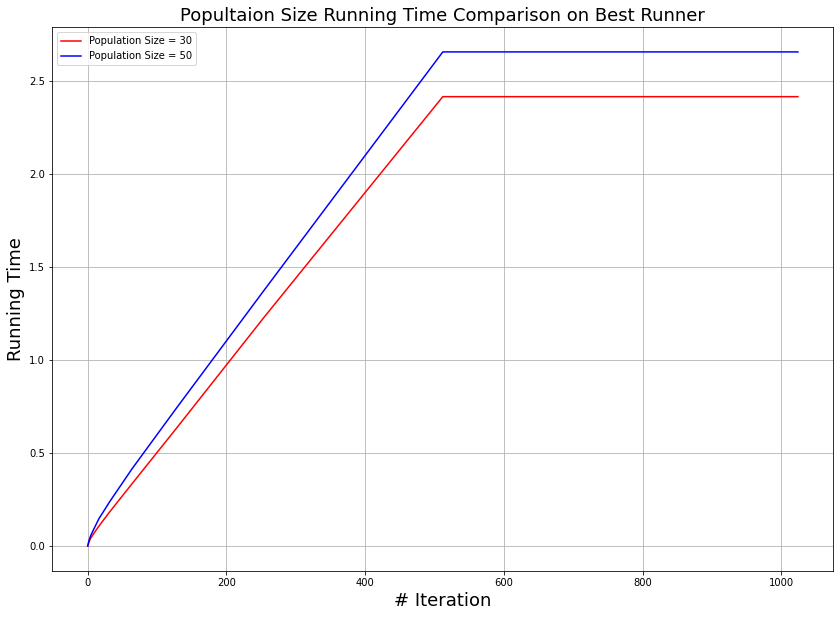

In [ ]:
iter_compare(best_params_run_mc['Iteration'], best_params_run_mc['Time'], best_params_run_mc_large_pop['Time'], 'Population Size = 30', 'Population Size = 50',
            '# Iteration', 'Running Time', 'Popultaion Size Running Time')

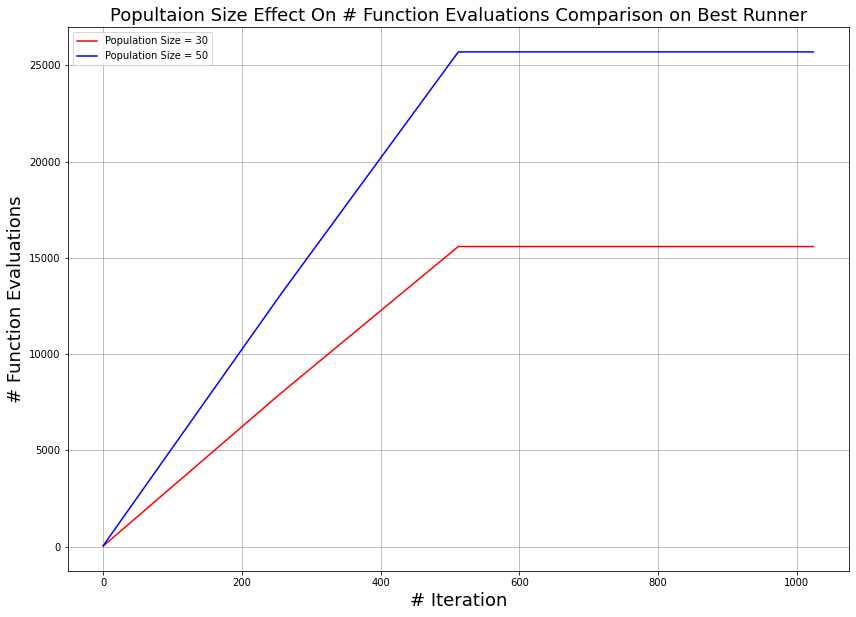

In [ ]:
iter_compare(best_params_run_mc['Iteration'], best_params_run_mc['FEvals'], best_params_run_mc_large_pop['FEvals'], 'Population Size = 30', 'Population Size = 50',
            '# Iteration', '# Function Evaluations', 'Popultaion Size Effect On # Function Evaluations')

In [ ]:
best_params_run_mc_low_keep = df_mc_stats[(df_mc_stats['Population Size'] == pop_size) &
                              (df_mc_stats['Keep Percent'] == 0.1)]

best_params_run_mc_low_keep                              

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
48,0,9.0,30,0.000824,"[1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0]",True,30,0.1,1024
49,1,2.0,62,0.011190,"[0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,30,0.1,1024
50,2,2.0,93,0.021291,"[0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,30,0.1,1024
51,4,2.0,155,0.035504,"[0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,30,0.1,1024
52,8,2.0,279,0.058154,"[0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,30,0.1,1024
53,16,2.0,527,0.106053,"[0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,30,0.1,1024
54,32,2.0,1023,0.183703,"[0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,30,0.1,1024
55,64,2.0,2015,0.335966,"[0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,30,0.1,1024
56,128,2.0,3999,0.643925,"[0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,30,0.1,1024
57,256,2.0,7967,1.239590,"[0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, ...",True,30,0.1,1024


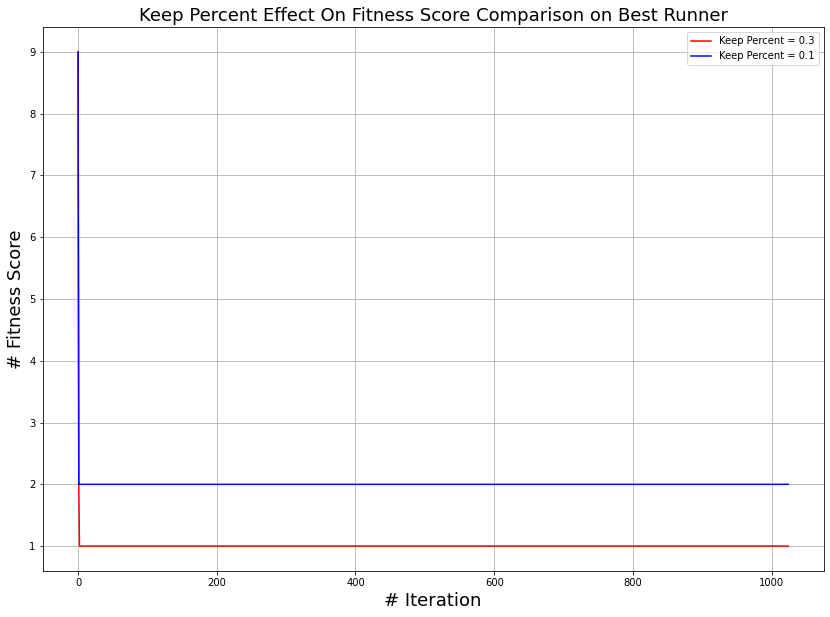

In [ ]:
iter_compare(best_params_run_mc['Iteration'], best_params_run_mc['Fitness'], best_params_run_mc_low_keep['Fitness'], 'Keep Percent = 0.3', 'Keep Percent = 0.1',
            '# Iteration', '# Fitness Score', 'Keep Percent Effect On Fitness Score')

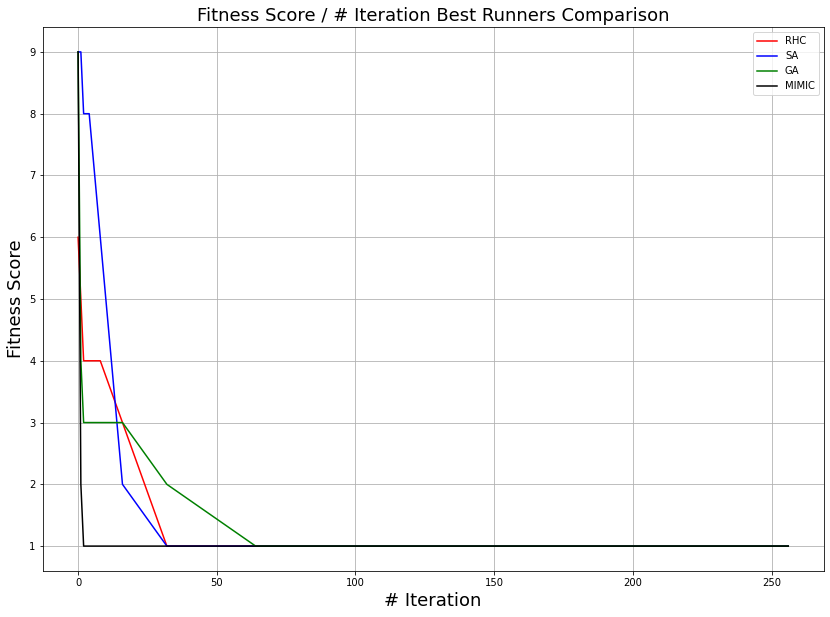

In [ ]:
iter_final_compare(best_params_runs_rhc['Iteration'].iloc()[:10], best_params_runs_rhc['Fitness'].iloc()[:10], best_params_runs_sa['Fitness'].iloc()[:10],
                   best_params_runs_ga['Fitness'].iloc()[:10], best_params_run_mc['Fitness'].iloc()[:10], 'RHC', 'SA', 'GA', 'MIMIC',
                    '# Iteration', 'Fitness Score', 'Fitness Score / # Iteration')

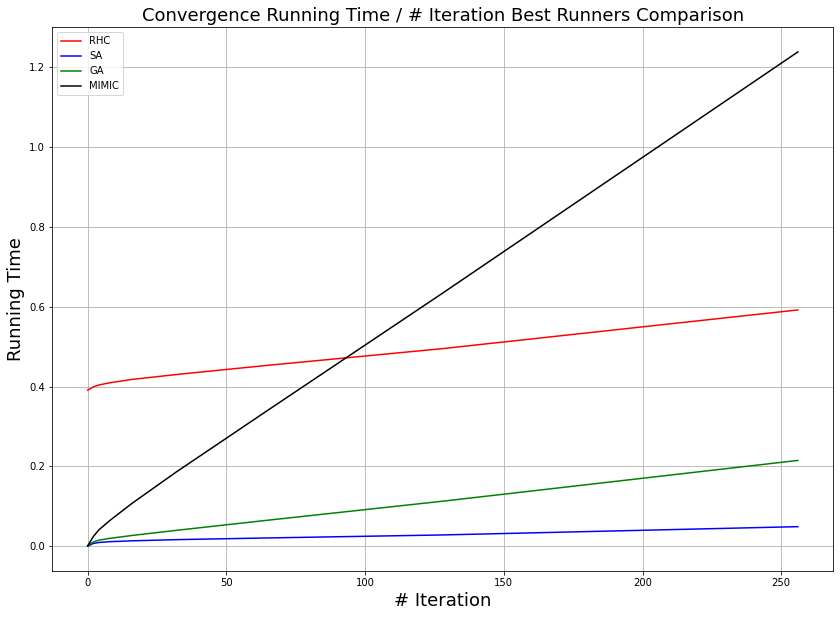

In [ ]:
# RHC does not converge during first and second restarts, That's why it starts from 0.4
iter_final_compare(best_params_runs_rhc['Iteration'].iloc()[:10], best_params_runs_rhc['Time'].iloc()[:10], best_params_runs_sa['Time'].iloc()[:10],
                   best_params_runs_ga['Time'].iloc()[:10], best_params_run_mc['Time'].iloc()[:10], 'RHC', 'SA', 'GA', 'MIMIC',
                    '# Iteration', 'Running Time', 'Convergence Running Time / # Iteration')